In [206]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df = pd.read_csv('yelp_businesses.csv')

In [16]:
final = []
for category in ast.literal_eval(df['categories'][0]):
    output = [category['alias'], category['title'], df['id'][0]]
    final.append(output)
final

[['newamerican', 'American (New)', 'YVERvPBMurED_1yWtigJQw'],
 ['bars', 'Bars', 'YVERvPBMurED_1yWtigJQw'],
 ['seafood', 'Seafood', 'YVERvPBMurED_1yWtigJQw']]

In [137]:
output = []
for num, restaurant in enumerate(df['categories']):
    for category in ast.literal_eval(restaurant):
        temp_list = [df['id'][num], category['alias'], category['title'], df['rating'][num], df['review_count'][num]]
        output.append(temp_list)

In [138]:
category_df = pd.DataFrame(output)

In [139]:
category_df.rename(columns = {0:'business_id', 1:'alias', 2:'title', 3: 'rating', 4: 'review_count'}, inplace = True)

In [140]:
category_df

,business_id,alias,title,rating,review_count
0,YVERvPBMurED_1yWtigJQw,newamerican,American (New),4.0,72
1,YVERvPBMurED_1yWtigJQw,bars,Bars,4.0,72
2,YVERvPBMurED_1yWtigJQw,seafood,Seafood,4.0,72
3,uMNgVdpOI22QFTkxaVo9sA,seafood,Seafood,4.0,101
4,uMNgVdpOI22QFTkxaVo9sA,tradamerican,American (Traditional),4.0,101
...,...,...,...,...,...
427,pjngrCUGboFoN_ECLV4DnQ,hotdogs,Fast Food,1.5,6
428,pjngrCUGboFoN_ECLV4DnQ,mexican,Mexican,1.5,6
429,zdDGGZlW937ACVmbedGrBA,chinese,Chinese,2.0,22
430,78UO-Qgt-Ja0RFIRHWxPDg,delis,Delis,1.0,1


In [145]:
count_df = category_df.groupby('title').count()['business_id']

In [146]:
count_df

title
American (New)            19
American (Traditional)    29
Art Galleries              1
Asian Fusion               1
Bagels                     7
                          ..
Vegan                      2
Vegetarian                 2
Venues & Event Spaces      3
Waffles                    1
Wraps                      2
Name: business_id, Length: 70, dtype: int64

In [68]:
count_df_newindex = count_df.reset_index()

In [87]:
new_count_df = count_df_newindex.sort_values('business_id', ascending = False)

In [260]:
top_category_counts = new_count_df[new_count_df['business_id']>=3].reset_index()

In [261]:
top_category_counts.drop('index', axis=1, inplace = True)

In [262]:
top_category_counts

,title,business_id
0,Seafood,51
1,Breakfast & Brunch,32
2,Sandwiches,30
3,American (Traditional),29
4,Pizza,28
5,American (New),19
6,Italian,19
7,Delis,17
8,Mexican,16
9,Burgers,14


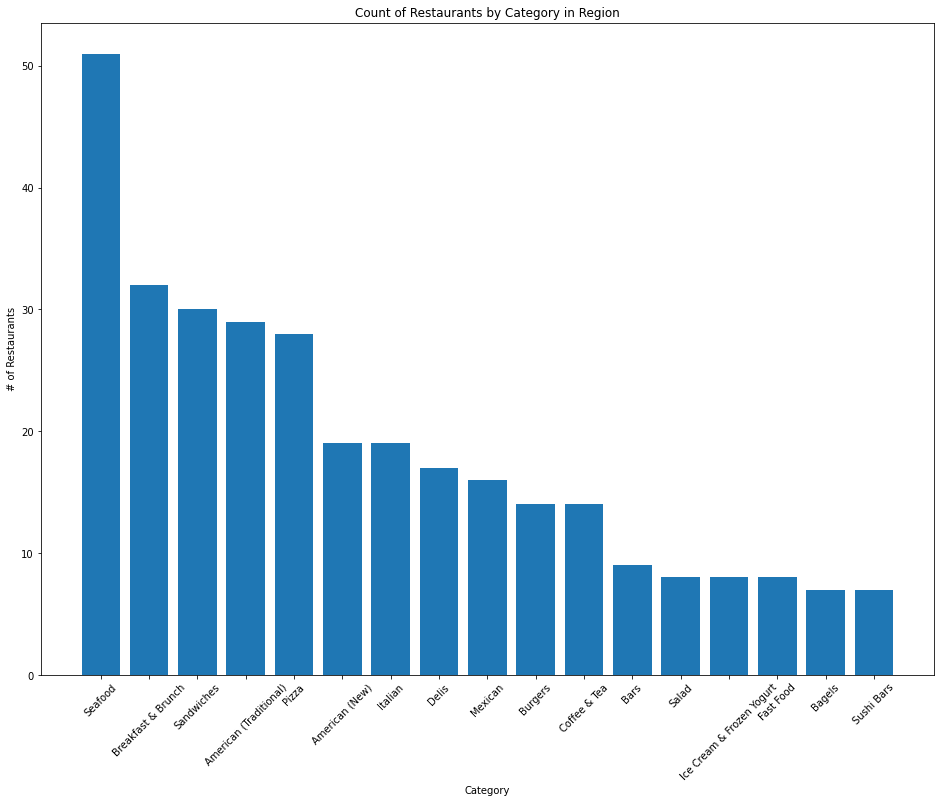

In [105]:
figure, ax = plt.subplots(figsize=(16,12))
ax.bar(top_category_counts['title'], top_category_counts['business_id'])
ax.set_xlabel('Category')
ax.set_ylabel('# of Restaurants')
ax.set_title('Count of Restaurants by Category in Region')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [126]:
list(top_category_counts['title'])

['Seafood',
 'Breakfast & Brunch',
 'Sandwiches',
 'American (Traditional)',
 'Pizza',
 'American (New)',
 'Italian',
 'Delis',
 'Mexican',
 'Burgers',
 'Coffee & Tea',
 'Bars',
 'Salad',
 'Ice Cream & Frozen Yogurt',
 'Fast Food',
 'Bagels',
 'Sushi Bars']

In [142]:
average_df = category_df.groupby('title').mean()

In [143]:
average_df.reset_index(inplace = True)

In [149]:
top_df = average_df.loc[average_ratings['title'].isin(top_categories)]

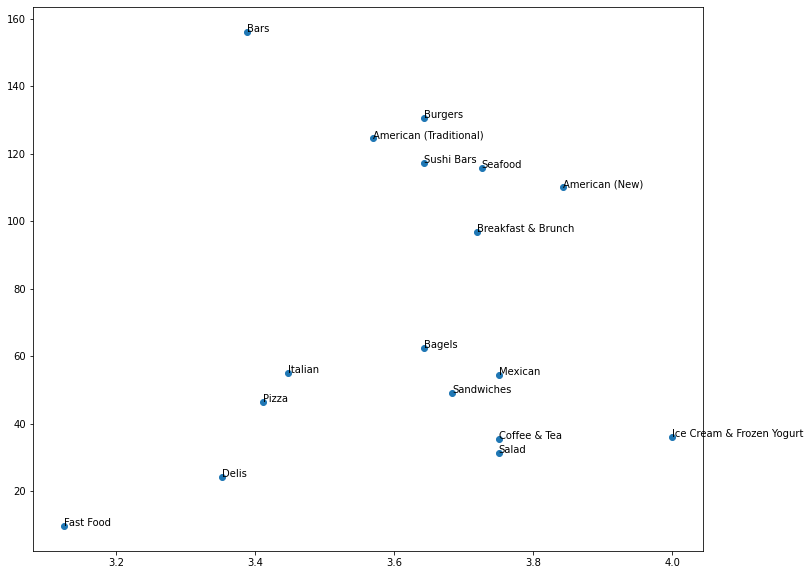

In [163]:
figure, ax = plt.subplots(figsize=(12,10))
ax.scatter(top_df['rating'], top_df['review_count'])
for i, label in enumerate(top_df['title']):
    plt.annotate(label, (top_df['rating'][i], top_df['review_count'][i]))

In [158]:
top_df.reset_index(inplace=True)

In [166]:
area_df=pd.read_csv('business_info_with_area.csv')

In [171]:
only_area_df = area_df[['id', 'area']]

In [168]:
category_df

,business_id,alias,title,rating,review_count
0,YVERvPBMurED_1yWtigJQw,newamerican,American (New),4.0,72
1,YVERvPBMurED_1yWtigJQw,bars,Bars,4.0,72
2,YVERvPBMurED_1yWtigJQw,seafood,Seafood,4.0,72
3,uMNgVdpOI22QFTkxaVo9sA,seafood,Seafood,4.0,101
4,uMNgVdpOI22QFTkxaVo9sA,tradamerican,American (Traditional),4.0,101
...,...,...,...,...,...
427,pjngrCUGboFoN_ECLV4DnQ,hotdogs,Fast Food,1.5,6
428,pjngrCUGboFoN_ECLV4DnQ,mexican,Mexican,1.5,6
429,zdDGGZlW937ACVmbedGrBA,chinese,Chinese,2.0,22
430,78UO-Qgt-Ja0RFIRHWxPDg,delis,Delis,1.0,1


In [173]:
merge_df = pd.merge(left=category_df, right=only_area_df, how='left', left_on='business_id', right_on='id')

In [181]:
category_area_df = merge_df[(merge_df['title']=='Burgers') | (merge_df['title']=='American (Traditional)') | 
         (merge_df['title']=='Sushi Bars') | (merge_df['title']=='Seafood') | 
         (merge_df['title']=='Breakfast & Brunch') | (merge_df['title']=='American (New)')]

In [188]:
clean_df = category_area_df.reset_index().drop('index', axis = 1).drop('id', axis =1)

In [189]:
clean_df

,business_id,alias,title,rating,review_count,area
0,YVERvPBMurED_1yWtigJQw,newamerican,American (New),4.0,72,island-north
1,YVERvPBMurED_1yWtigJQw,seafood,Seafood,4.0,72,island-north
2,uMNgVdpOI22QFTkxaVo9sA,seafood,Seafood,4.0,101,island-south
3,uMNgVdpOI22QFTkxaVo9sA,tradamerican,American (Traditional),4.0,101,island-south
4,uBMQXMgvK1iVdmS4CglCKA,seafood,Seafood,4.0,294,island-north
...,...,...,...,...,...,...
147,R0OQxBmBIl689jhZbjvkGg,breakfast_brunch,Breakfast & Brunch,3.0,39,mainland
148,R0OQxBmBIl689jhZbjvkGg,burgers,Burgers,3.0,39,mainland
149,KBujNRgPKgT3Mu5aat2kiA,burgers,Burgers,2.0,10,mainland
150,QF8l1lcM0_Zvx2835bN5cw,burgers,Burgers,3.5,9,mainland


In [198]:
final_df = clean_df.groupby(['title', 'area']).count()['business_id']

In [203]:
final_df_reset=final_df.reset_index()

In [204]:
final_df_reset

,title,area,business_id
0,American (New),island-north,13
1,American (New),island-south,4
2,American (New),mainland,2
3,American (Traditional),island-north,8
4,American (Traditional),island-south,14
5,American (Traditional),mainland,7
6,Breakfast & Brunch,island-north,14
7,Breakfast & Brunch,island-south,11
8,Breakfast & Brunch,mainland,7
9,Burgers,island-north,6


In [222]:
pivot_df = pd.pivot_table(final_df_reset, values='business_id', index='area', columns='title', aggfunc=np.sum)

In [223]:
pivot_df

title,American (New),American (Traditional),Breakfast & Brunch,Burgers,Seafood,Sushi Bars
area,,,,,,
island-north,13,8,14,6,16,3
island-south,4,14,11,4,27,2
mainland,2,7,7,4,8,2


<BarContainer object of 3 artists>

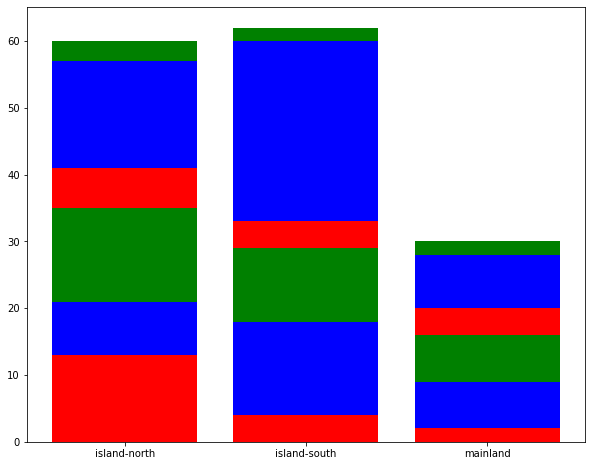

In [225]:
#x = ['American (New)', 'American (Traditional)', 'Breakfast & Brunch', 'Burgers', 'Seafood', 'Sushi Bars']
x = ['island-north', 'island-south', 'mainland']
y1 = pivot_df['American (New)']
y2 = pivot_df['American (Traditional)']
y3 = pivot_df['Breakfast & Brunch']
y4 = pivot_df['Burgers']
y5 = pivot_df['Seafood']
y6 = pivot_df['Sushi Bars']
figure, ax = plt.subplots(figsize=(10, 8))
ax.bar(x, y1, color = 'r')
ax.bar(x, y2, bottom = y1, color = 'b')
ax.bar(x, y3, bottom = y1+y2, color = 'g')
ax.bar(x, y4, bottom = y1+y2+y3, color = 'r')
ax.bar(x, y5, bottom = y1+y2+y3+y4, color = 'b')
ax.bar(x, y6, bottom = y1+y2+y3+y4+y5, color = 'g')

In [226]:
clean_df

,business_id,alias,title,rating,review_count,area
0,YVERvPBMurED_1yWtigJQw,newamerican,American (New),4.0,72,island-north
1,YVERvPBMurED_1yWtigJQw,seafood,Seafood,4.0,72,island-north
2,uMNgVdpOI22QFTkxaVo9sA,seafood,Seafood,4.0,101,island-south
3,uMNgVdpOI22QFTkxaVo9sA,tradamerican,American (Traditional),4.0,101,island-south
4,uBMQXMgvK1iVdmS4CglCKA,seafood,Seafood,4.0,294,island-north
...,...,...,...,...,...,...
147,R0OQxBmBIl689jhZbjvkGg,breakfast_brunch,Breakfast & Brunch,3.0,39,mainland
148,R0OQxBmBIl689jhZbjvkGg,burgers,Burgers,3.0,39,mainland
149,KBujNRgPKgT3Mu5aat2kiA,burgers,Burgers,2.0,10,mainland
150,QF8l1lcM0_Zvx2835bN5cw,burgers,Burgers,3.5,9,mainland


In [233]:
top_half = clean_df[clean_df['rating']>3.5]

In [234]:
top_half_grouped = top_half.groupby(['title', 'area']).count()['business_id']

In [235]:
top_half_reset=top_half_grouped.reset_index()

In [251]:
top_half_reset

,title,area,business_id
0,American (New),island-north,7.0
1,American (New),island-south,3.0
2,American (New),mainland,1.0
3,American (Traditional),island-north,3.0
4,American (Traditional),island-south,7.0
5,American (Traditional),mainland,1.0
6,Breakfast & Brunch,island-north,9.0
7,Breakfast & Brunch,island-south,6.0
8,Breakfast & Brunch,mainland,3.0
9,Burgers,island-north,4.0


In [253]:
top_half_reset.loc[15,'title']='Burgers'
top_half_reset.loc[15,'area']='mainland'
top_half_reset.loc[15,'business_id']=0
top_half_reset.loc[16,'title']='Sushi Bars'
top_half_reset.loc[16,'area']='mainland'
top_half_reset.loc[16,'business_id']=0
top_half_reset.loc[17,'title']='Sushi Bars'
top_half_reset.loc[17,'area']='island-south'
top_half_reset.loc[17,'business_id']=0

In [254]:
top_pivot_df = pd.pivot_table(top_half_reset, values='business_id', index='area', columns='title', aggfunc=np.sum)

<BarContainer object of 3 artists>

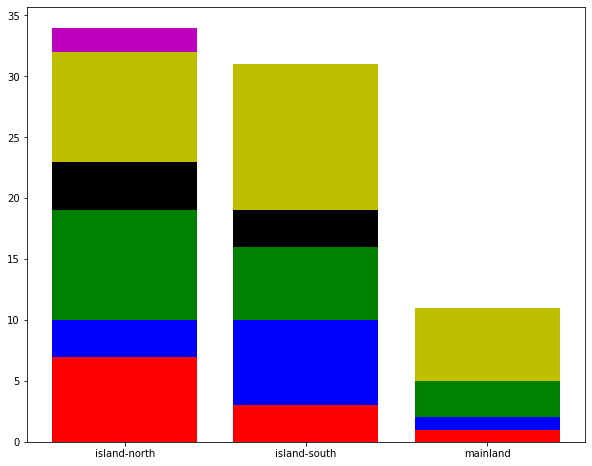

In [255]:
x = ['island-north', 'island-south', 'mainland']
y1 = top_pivot_df['American (New)']
y2 = top_pivot_df['American (Traditional)']
y3 = top_pivot_df['Breakfast & Brunch']
y4 = top_pivot_df['Burgers']
y5 = top_pivot_df['Seafood']
y6 = top_pivot_df['Sushi Bars']
figure, ax = plt.subplots(figsize=(10, 8))
ax.bar(x, y1, color = 'r')
ax.bar(x, y2, bottom = y1, color = 'b')
ax.bar(x, y3, bottom = y1+y2, color = 'g')
ax.bar(x, y4, bottom = y1+y2+y3, color = 'k')
ax.bar(x, y5, bottom = y1+y2+y3+y4, color = 'y')
ax.bar(x, y6, bottom = y1+y2+y3+y4+y5, color = 'm')

In [256]:
top_pivot_df

title,American (New),American (Traditional),Breakfast & Brunch,Burgers,Seafood,Sushi Bars
area,,,,,,
island-north,7.0,3.0,9.0,4.0,9.0,2.0
island-south,3.0,7.0,6.0,3.0,12.0,0.0
mainland,1.0,1.0,3.0,0.0,6.0,0.0
